In [54]:
import matplotlib.pyplot as plt
import data
import utils
import ncvis
from umap import UMAP
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_rcv1
from sklearn.datasets import fetch_20newsgroups

#%load_ext wurlitzer

In [55]:
# Datasets can be dowloaded by using the download.sh script: 
# bash data/download.sh <dataset>
# Replace <dataset> with corresponding entry from the table. You can also download all of them at once:
ds_iris = data.Iris() # bash data/download.sh iris
ds_mnist = data.MNIST() # bash data/download.sh mnist
ds_fashion_mnist = data.FMNIST() # bash data/download.sh fmnist
ds_pendigits = data.PenDigits() # bash data/download.sh pendigits
ds_shuttle = data.Shuttle() # bash data/download.sh shuttle
rcv1 = fetch_rcv1()
Ys = {}

### 20newsgroups dataset
The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). For this analysis only the train subset was used and 10 out of 20 categories (listed below). Text data was transformed into vectors for the purpose of further transformations.

In [56]:
categories = ['comp.graphics',
              'comp.os.ms-windows.misc',
              'comp.sys.ibm.pc.hardware',
              'comp.sys.mac.hardware',
              'rec.sport.baseball',
              'sci.electronics',
             'sci.space',
             'talk.politics.guns',
             'alt.atheism',
             'soc.religion.christian']

In [57]:
news_data = fetch_20newsgroups(subset='train', categories=categories)

In [58]:
vectorizer = TfidfVectorizer()

In [59]:
news_data.target.shape

(5749,)

In [61]:
vectors = vectorizer.fit_transform(news_data.data)

In [62]:
vectors.toarray().shape

(5749, 91520)

In [114]:
%%time
vis = ncvis.NCVis(distance='correlation')
Ys['ncvis'] = vis.fit_transform(vectors.toarray())

Wall time: 2min 56s


In [115]:
%%capture --no-stdout
%%time
umap = UMAP(metric='correlation')
Ys['umap'] = umap.fit_transform(vectors.toarray())

Wall time: 2min 9s


In [116]:
%%time
tsne = TSNE()
Ys['tsne'] = tsne.fit_transform(vectors.toarray())

Wall time: 46 s


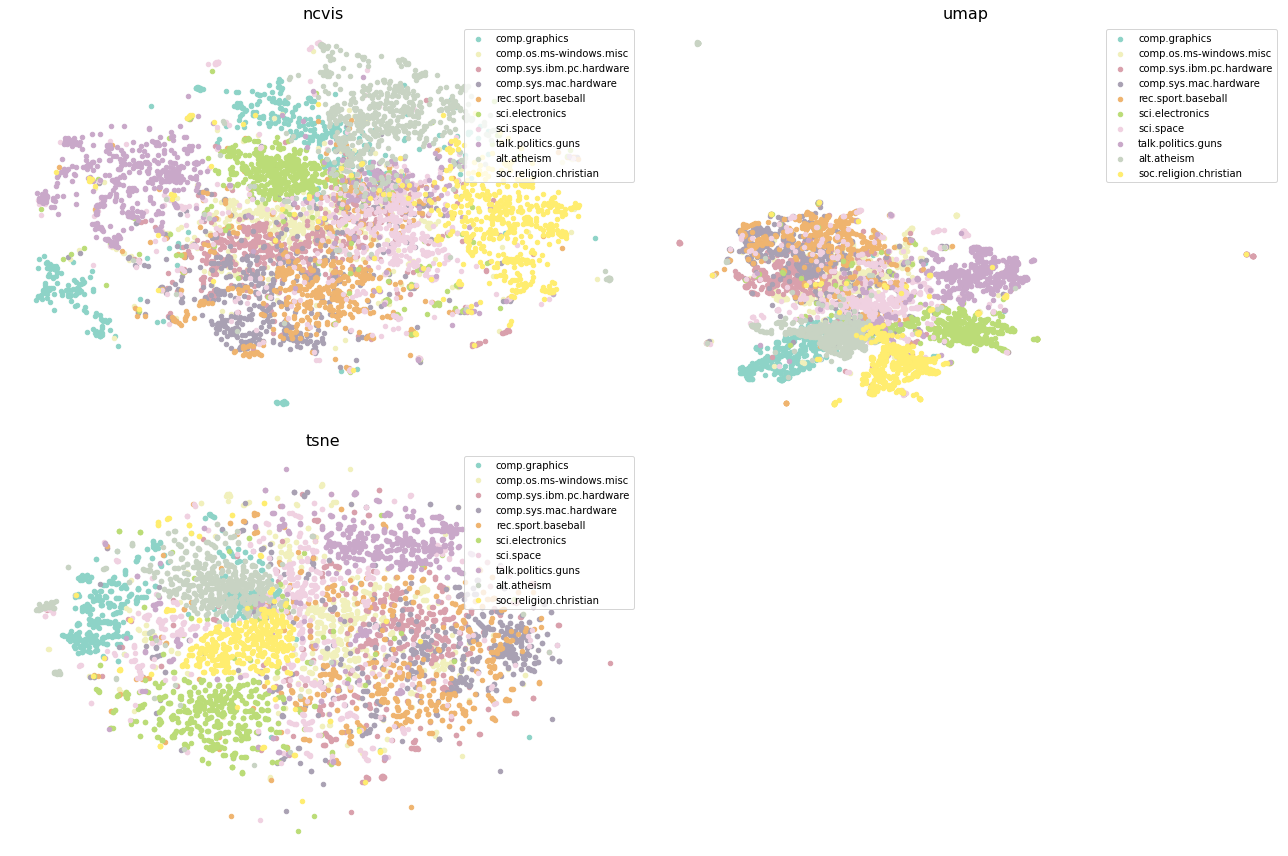

In [133]:
n_cols = 2
n_imgs = len(Ys.items())
n_rows = (n_imgs+n_cols-1)//n_cols 

fig, ax = plt.subplots(n_rows, n_cols, figsize=(18, 12))
ax = ax.ravel()

for k, (name, Y) in enumerate(Ys.items()):
    ax[k].set_title(name, fontsize=16)
    ax[k].set_axis_off()
    utils.scatter_classes(Y, news_data.target, ax[k], marker='o', s=20, alpha=1,
                          show_labels=True, labels=categories)
while k < n_imgs:
    k += 1
    ax[k].set_axis_off()
    
plt.tight_layout()
plt.show()
fig.savefig("img/20newsgroups.png")

### IRIS dataset

In [4]:
print("Number of samples:", len(ds_iris))

Number of samples: 150


In [5]:
%%time
vis = ncvis.NCVis(distance='correlation')
Ys['ncvis'] = vis.fit_transform(ds_iris.X)

Wall time: 112 ms


In [6]:
%%capture --no-stdout
%%time
umap = UMAP(metric='correlation')
Ys['umap'] = umap.fit_transform(ds_iris.X)

Wall time: 5.42 s


In [7]:
%%time
tsne = TSNE()
Ys['tsne'] = tsne.fit_transform(ds_iris.X)

Wall time: 582 ms


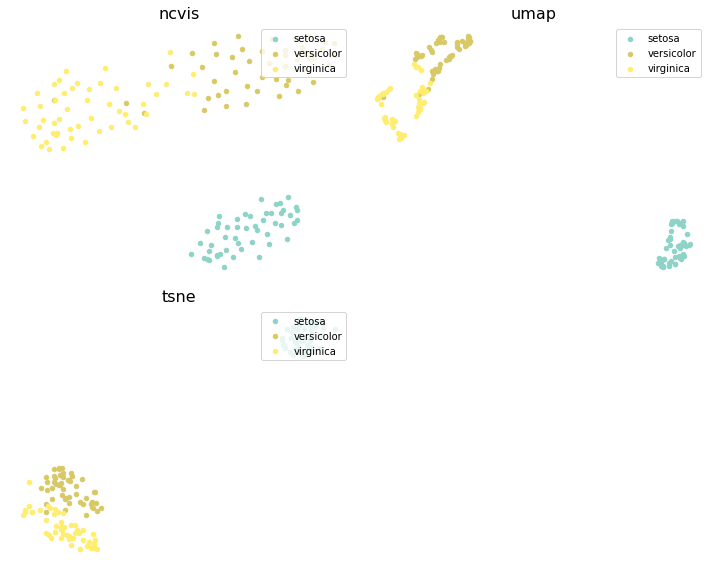

In [8]:
n_cols = 2
n_imgs = len(Ys.items())
n_rows = (n_imgs+n_cols-1)//n_cols 

fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 8))
ax = ax.ravel()

for k, (name, Y) in enumerate(Ys.items()):
    ax[k].set_title(name, fontsize=16)
    ax[k].set_axis_off()
    utils.scatter_classes(Y, ds_iris.y, ax[k], marker='o', s=20, alpha=1,
                          show_labels=True, labels=['setosa', 'versicolor', 'virginica'])
while k < n_imgs:
    k += 1
    ax[k].set_axis_off()
    
plt.tight_layout()
plt.show()
fig.savefig("img/iris.png")

### MNIST dataset

Number of samples: 70000


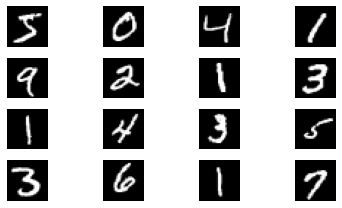

In [8]:
print("Number of samples:", len(ds_mnist))
n_cols = 4
n_rows = 4

fig, ax = plt.subplots(n_rows, n_cols, figsize=(6, 3))
ax = ax.ravel()

for i in range(len(ax)):
    ax[i].set_axis_off()
    ax[i].imshow(ds_mnist.X[i].reshape(ds_mnist.shape), cmap="gray")

plt.tight_layout()
plt.show()

In [9]:
%%time
vis = ncvis.NCVis(distance='correlation')
Ys['ncvis'] = vis.fit_transform(ds_mnist.X)

Wall time: 25.9 s


In [10]:
%%capture --no-stdout
%%time
umap = UMAP(metric='correlation')
Ys['umap'] = umap.fit_transform(ds_mnist.X)

Wall time: 42.9 s


In [11]:
%%time
tsne = TSNE()
Ys['tsne'] = tsne.fit_transform(ds_mnist.X)

Wall time: 9min 5s


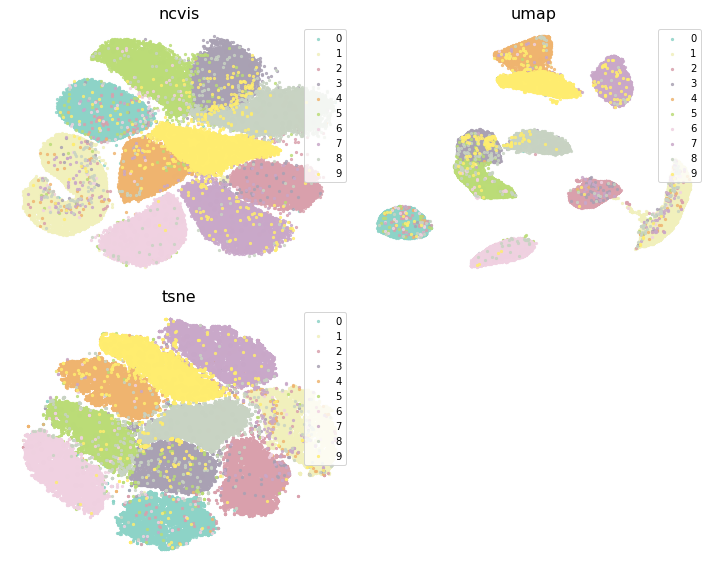

In [12]:
n_cols = 2
n_imgs = len(Ys.items())
n_rows = (n_imgs+n_cols-1)//n_cols 

fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 8))
ax = ax.ravel()

for k, (name, Y) in enumerate(Ys.items()):
    ax[k].set_title(name, fontsize=16)
    ax[k].set_axis_off()
    utils.scatter_classes(Y, ds_mnist.y, ax[k], marker='.', s=20, alpha=0.8,
                          show_labels=True)
while k < n_imgs:
    k += 1
    ax[k].set_axis_off()
    
plt.tight_layout()
plt.show()
fig.savefig("img/mnist.png")

### Fashion MNIST dataset

Number of samples: 70000


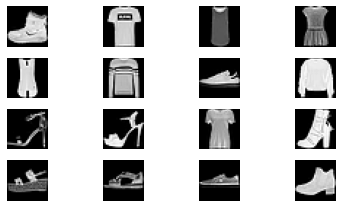

In [13]:
print("Number of samples:", len(ds_fashion_mnist))
n_cols = 4
n_rows = 4

fig, ax = plt.subplots(n_rows, n_cols, figsize=(6, 3))
ax = ax.ravel()

for i in range(len(ax)):
    ax[i].set_axis_off()
    ax[i].imshow(ds_fashion_mnist.X[i].reshape(ds_fashion_mnist.shape), cmap="gray")

plt.tight_layout()
plt.show()

In [14]:
%%time
vis = ncvis.NCVis(distance='correlation')
Ys['ncvis'] = vis.fit_transform(ds_fashion_mnist.X)

Wall time: 27.6 s


In [15]:
%%capture --no-stdout
%%time
umap = UMAP(metric='correlation')
Ys['umap'] = umap.fit_transform(ds_fashion_mnist.X)

Wall time: 49 s


In [16]:
%%time
tsne = TSNE()
Ys['tsne'] = tsne.fit_transform(ds_fashion_mnist.X)

Wall time: 9min 22s


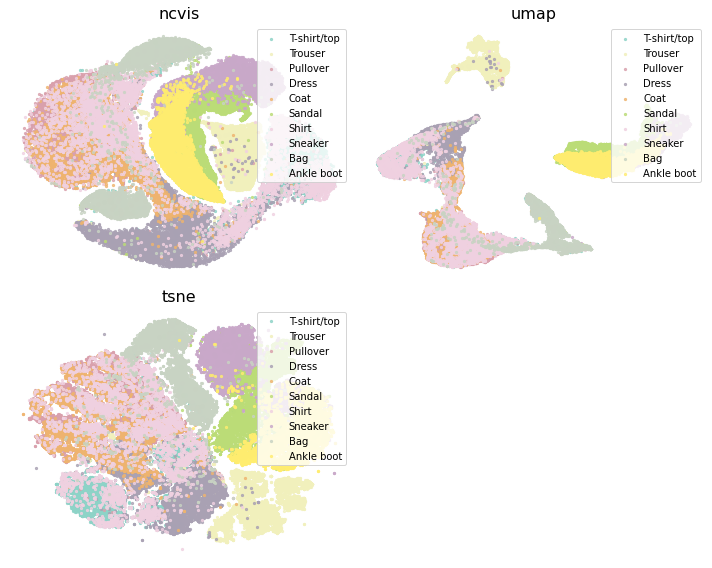

In [17]:
n_cols = 2
n_imgs = len(Ys.items())
n_rows = (n_imgs+n_cols-1)//n_cols 

fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 8))
ax = ax.ravel()

for k, (name, Y) in enumerate(Ys.items()):
    ax[k].set_title(name, fontsize=16)
    ax[k].set_axis_off()
    utils.scatter_classes(Y, ds_fashion_mnist.y, ax[k], marker='.', s=20, alpha=0.8,
                          show_labels=True, labels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag','Ankle boot'])
while k < n_imgs:
    k += 1
    ax[k].set_axis_off()
    
plt.tight_layout()
plt.show()
fig.savefig("img/fashion_mnist.png")

### Pendigits dataset

Number of samples: 5620


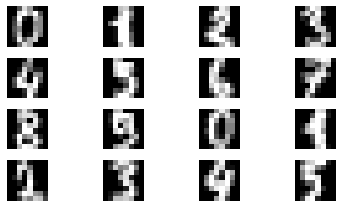

In [18]:
print("Number of samples:", len(ds_pendigits))
n_cols = 4
n_rows = 4

fig, ax = plt.subplots(n_rows, n_cols, figsize=(6, 3))
ax = ax.ravel()

for i in range(len(ax)):
    ax[i].set_axis_off()
    ax[i].imshow(ds_pendigits.X[i].reshape(ds_pendigits.shape), cmap="gray")

plt.tight_layout()
plt.show()

In [19]:
%%time
vis = ncvis.NCVis(distance='correlation')
Ys['ncvis'] = vis.fit_transform(ds_pendigits.X)

Wall time: 1.05 s


In [20]:
%%capture --no-stdout
%%time
umap = UMAP(metric='correlation')
Ys['umap'] = umap.fit_transform(ds_pendigits.X)

Wall time: 6.35 s


In [21]:
%%time
tsne = TSNE()
Ys['tsne'] = tsne.fit_transform(ds_pendigits.X)

Wall time: 31.1 s


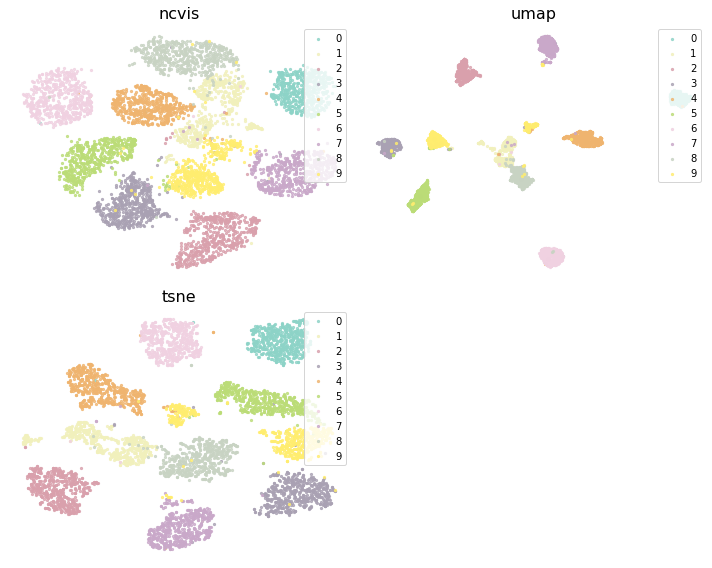

In [22]:
n_cols = 2
n_imgs = len(Ys.items())
n_rows = (n_imgs+n_cols-1)//n_cols 

fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 8))
ax = ax.ravel()

for k, (name, Y) in enumerate(Ys.items()):
    ax[k].set_title(name, fontsize=16)
    ax[k].set_axis_off()
    utils.scatter_classes(Y, ds_pendigits.y, ax[k], marker='.', s=20, alpha=0.8,
                          show_labels=True)
while k < n_imgs:
    k += 1
    ax[k].set_axis_off()
    
plt.tight_layout()
plt.show()
fig.savefig("img/pendigits.png")

### Shuttle dataset
This dataset from the UCI Machine Learning
Repository contains 9 numeric attributes used to
classify into one of 7 classes. There are 58,000 data
points in total, which were partitioned into a training
set of 29,000 data points, and a test and validation
set each consisting of 14,500 data points. 80% of the
samples provided in this dataset belongs to one class,
and so this information combined with the relatively
large amount of data makes this a fairly easy numeric
dataset.

In [98]:
print("Number of samples:", len(ds_shuttle))

Number of samples: 57998


In [99]:
%%time
vis = ncvis.NCVis(distance='correlation')
Ys['ncvis'] = vis.fit_transform(ds_shuttle.X)

Wall time: 6.29 s


In [25]:
%%capture --no-stdout
%%time
umap = UMAP(metric='correlation')
Ys['umap'] = umap.fit_transform(ds_shuttle.X)

Wall time: 34.5 s


In [26]:
%%time
tsne = TSNE()
Ys['tsne'] = tsne.fit_transform(ds_shuttle.X)

Wall time: 5min 32s


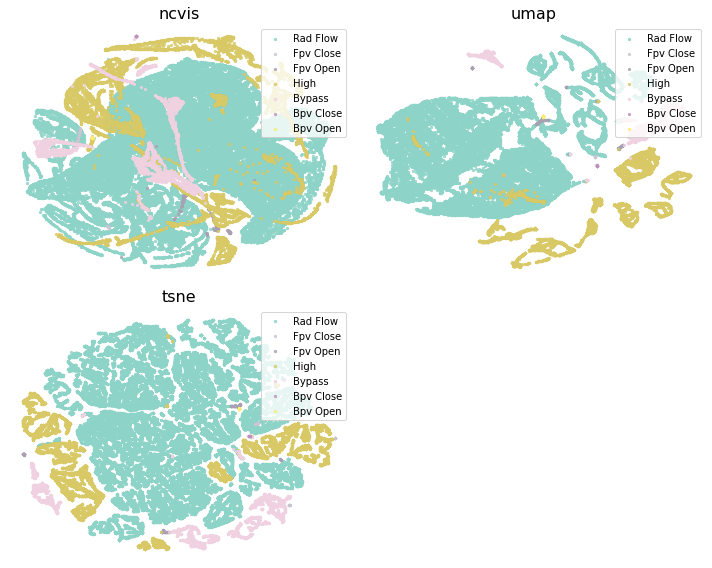

In [27]:
n_cols = 2
n_imgs = len(Ys.items())
n_rows = (n_imgs+n_cols-1)//n_cols 

fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 8))
ax = ax.ravel()

for k, (name, Y) in enumerate(Ys.items()):
    ax[k].set_title(name, fontsize=16)
    ax[k].set_axis_off()
    utils.scatter_classes(Y, ds_shuttle.y, ax[k], marker='.', s=20, alpha=0.8,
                          show_labels=True, labels=['X','Rad Flow', 'Fpv Close', 'Fpv Open', 'High', 'Bypass', 'Bpv Close', 'Bpv Open'])
while k < n_imgs:
    k += 1
    ax[k].set_axis_off()
    
plt.tight_layout()
plt.show()
fig.savefig("img/shuttle.png")

### NCVIS speed tests

In [28]:
ds_fashion_mnist.X.shape

(70000, 784)

### 1% of dataset

In [29]:
ds_fashion_mnist_1_X = ds_fashion_mnist.X[:700, :]
ds_fashion_mnist_1_X.shape

(700, 784)

In [30]:
%%time
vis = ncvis.NCVis(distance='correlation')
Ys['ncvis'] = vis.fit_transform(ds_fashion_mnist_1_X)

Wall time: 173 ms


In [31]:
%%capture --no-stdout
%%time
umap = UMAP(metric='correlation')
Ys['umap'] = umap.fit_transform(ds_fashion_mnist_1_X)

Wall time: 3.53 s


In [32]:
%%time
tsne = TSNE()
Ys['tsne'] = tsne.fit_transform(ds_fashion_mnist_1_X)

Wall time: 3.81 s


### 5% of dataset

In [33]:
ds_fashion_mnist_5_X = ds_fashion_mnist.X[:3500, :]
ds_fashion_mnist_5_X.shape

(3500, 784)

In [34]:
%%time
vis = ncvis.NCVis(distance='correlation')
Ys['ncvis'] = vis.fit_transform(ds_fashion_mnist_5_X)

Wall time: 910 ms


In [35]:
%%capture --no-stdout
%%time
umap = UMAP(metric='correlation')
Ys['umap'] = umap.fit_transform(ds_fashion_mnist_5_X)

Wall time: 23.4 s


In [36]:
%%time
tsne = TSNE()
Ys['tsne'] = tsne.fit_transform(ds_fashion_mnist_5_X)

Wall time: 19.3 s


### 10% of dataset

In [37]:
ds_fashion_mnist_10_X = ds_fashion_mnist.X[:7000, :]
ds_fashion_mnist_10_X.shape

(7000, 784)

In [38]:
%%time
vis = ncvis.NCVis(distance='correlation')
Ys['ncvis'] = vis.fit_transform(ds_fashion_mnist_10_X)

Wall time: 2.05 s


In [39]:
%%capture --no-stdout
%%time
umap = UMAP(metric='correlation')
Ys['umap'] = umap.fit_transform(ds_fashion_mnist_10_X)

Wall time: 9.29 s


In [40]:
%%time
tsne = TSNE()
Ys['tsne'] = tsne.fit_transform(ds_fashion_mnist_10_X)

Wall time: 49 s


### 20% of dataset

In [41]:
ds_fashion_mnist_20_X = ds_fashion_mnist.X[:14000, :]
ds_fashion_mnist_20_X.shape

(14000, 784)

In [42]:
%%time
vis = ncvis.NCVis(distance='correlation')
Ys['ncvis'] = vis.fit_transform(ds_fashion_mnist_20_X)

Wall time: 4.17 s


In [43]:
%%capture --no-stdout
%%time
umap = UMAP(metric='correlation')
Ys['umap'] = umap.fit_transform(ds_fashion_mnist_20_X)

Wall time: 8.17 s


In [44]:
%%time
tsne = TSNE()
Ys['tsne'] = tsne.fit_transform(ds_fashion_mnist_20_X)

Wall time: 1min 40s


### 40% of dataset

In [45]:
ds_fashion_mnist_40_X = ds_fashion_mnist.X[:28000, :]
ds_fashion_mnist_40_X.shape

(28000, 784)

In [46]:
%%time
vis = ncvis.NCVis(distance='correlation')
Ys['ncvis'] = vis.fit_transform(ds_fashion_mnist_40_X)

Wall time: 8.81 s


In [47]:
%%capture --no-stdout
%%time
umap = UMAP(metric='correlation')
Ys['umap'] = umap.fit_transform(ds_fashion_mnist_40_X)

Wall time: 14.9 s


In [48]:
%%time
tsne = TSNE()
Ys['tsne'] = tsne.fit_transform(ds_fashion_mnist_40_X)

Wall time: 3min 37s


### 60% of dataset

In [49]:
ds_fashion_mnist_60_X = ds_fashion_mnist.X[:42000, :]
ds_fashion_mnist_60_X.shape

(42000, 784)

In [50]:
%%time
vis = ncvis.NCVis(distance='correlation')
Ys['ncvis'] = vis.fit_transform(ds_fashion_mnist_60_X)

Wall time: 15.2 s


In [51]:
%%capture --no-stdout
%%time
umap = UMAP(metric='correlation')
Ys['umap'] = umap.fit_transform(ds_fashion_mnist_60_X)

Wall time: 22.2 s


In [52]:
%%time
tsne = TSNE()
Ys['tsne'] = tsne.fit_transform(ds_fashion_mnist_60_X)

Wall time: 6min 1s


### 80% of dataset

In [53]:
ds_fashion_mnist_80_X = ds_fashion_mnist.X[:56000, :]
ds_fashion_mnist_80_X.shape

(56000, 784)

In [54]:
%%time
vis = ncvis.NCVis(distance='correlation')
Ys['ncvis'] = vis.fit_transform(ds_fashion_mnist_80_X)

Wall time: 20.1 s


In [55]:
%%capture --no-stdout
%%time
umap = UMAP(metric='correlation')
Ys['umap'] = umap.fit_transform(ds_fashion_mnist_80_X)

Wall time: 31.5 s


In [56]:
%%time
tsne = TSNE()
Ys['tsne'] = tsne.fit_transform(ds_fashion_mnist_80_X)

Wall time: 7min 19s


### Summary

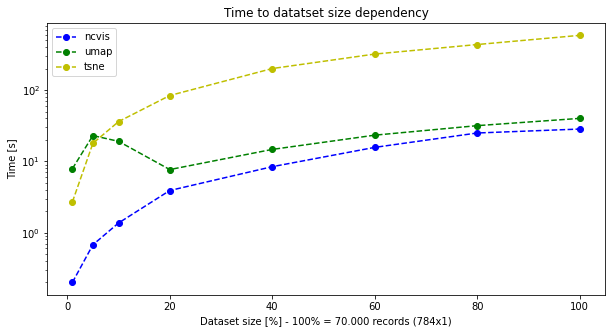

In [59]:
datasets_size = [1,5,10,20,40,60,80,100]
ncvis_times = [0.199, 0.673, 1.36, 3.89, 8.41, 15.7, 25, 28.4]
umap_times = [7.88, 23, 19.1, 7.66, 14.7, 23.3, 31.7, 40.1]
tsne_times = [2.69, 17.9, 36.1, 84, 201, 321, 437, 588]
plt.figure(figsize=(10,5))
plt.plot(datasets_size, ncvis_times,'bo--', label='ncvis')
plt.plot(datasets_size, umap_times,'go--', label='umap')
plt.plot(datasets_size, tsne_times,'yo--', label='tsne')
plt.title("Time to datatset size dependency")
plt.xlabel("Dataset size [%] - 100% = 70.000 records (784x1)")
plt.ylabel("Time [s]")
plt.legend(loc=2)
plt.yscale('log')
plt.savefig("img/speed_comparison.png")
plt.show()